# Machine Learning com Scikir Learn

## Principais Métodos e Abordagens em Machine Learning

**Aprendizado Supervisionado:**  O  algoritmo  é  treinado  com  um  conjunto  de  dados rotulados, onde os exemplos de entrada são associados a saídas corretas. O objetivo é aprender a mapear as entradas para as saídas e fazer previsões precisas em dados novos e desconhecidos

**Aprendizado Não Supervisionado:** O algoritmo é treinado com um conjunto de dados não rotulados e o objetivo é identificar padrões, estruturas ou agrupamentos nos dados. Técnicas comuns incluem clusterização e redução de dimensionalidade.

**Aprendizado Por Reforço:** O algoritmo aprende a tomar decisões com base em interações com um ambiente, recebendo feedback na forma de recompensas ou punições. O objetivo é maximizar a recompensa acumulada ao longo do tempo.

# Aprendizado Supervisionado

Nesse método, o algoritmo é treinado utilizando um conjunto de dados rotulados, em que  cada  exemplo  de  entrada  possui  uma  saída  correspondente,  também  conhecida  como "rótulo" ou "etiqueta". O objetivo é que o modelo aprenda a mapear as entradas para as saídas corretas e, assim, seja capaz de fazer previsões precisas para dados novos e desconhecidos.

Durante o processo de treinamento, o algoritmo analisa os exemplos deentrada e ajusta seus parâmetros internos para minimizar a diferença entre as previsões geradas e as saídas corretas (rótulos). Este processo é realizado iterativamente até que o modelo atinja um nível aceitável de precisão.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [67]:
df = pd.read_csv('arquivos/dataset_cap15.csv')
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [69]:
df.shape

(500, 2)

In [12]:
df.head(5)

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise Exploratória

In [15]:
# Verificar se há valores ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [17]:
# Correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [19]:
df.describe().round()

,horas_estudo_mes,salario
count,500.0,500.0
mean,50.0,6019.0
std,15.0,849.0
min,1.0,3664.0
25%,40.0,5473.0
50%,50.0,6014.0
75%,60.0,6542.0
max,100.0,9348.0


<AxesSubplot:xlabel='horas_estudo_mes', ylabel='Count'>

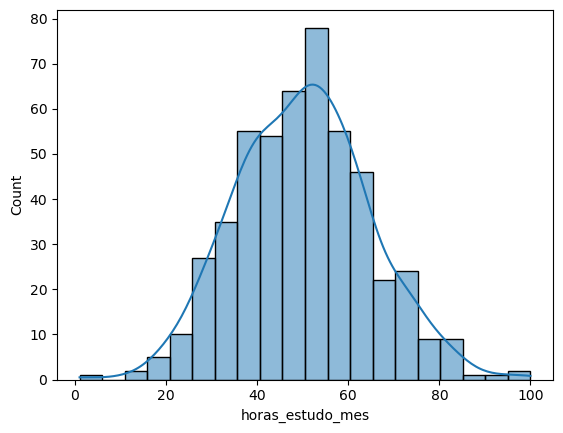

In [28]:
sns.histplot(df['horas_estudo_mes'], kde = True)

## Preparação dos dados

In [41]:
X = np.array(df['horas_estudo_mes'])

In [42]:
type(X)

numpy.ndarray

In [43]:
X = X.reshape(-1,1)

In [44]:
y = df['salario']

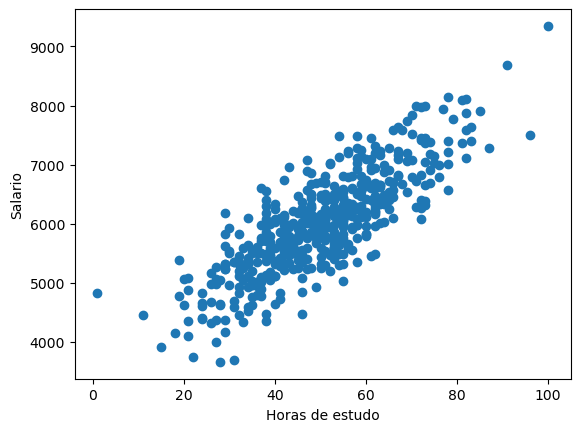

In [47]:
plt.scatter(X,y)
plt.xlabel("Horas de estudo")
plt.ylabel("Salario")
plt.show()

### Dividir em treino e teste usando amostragem aleatória

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

In [49]:
X_treino.shape

(400, 1)

In [50]:
X_teste.shape

(100, 1)

In [52]:
print(y_treino.shape)
print(y_teste.shape)

(400,)
(100,)


### Modelagem Preditiva (Machine Learning)

 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [88]:
# Cria um objeto da classe 
modelo = LinearRegression()

In [89]:
# Treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

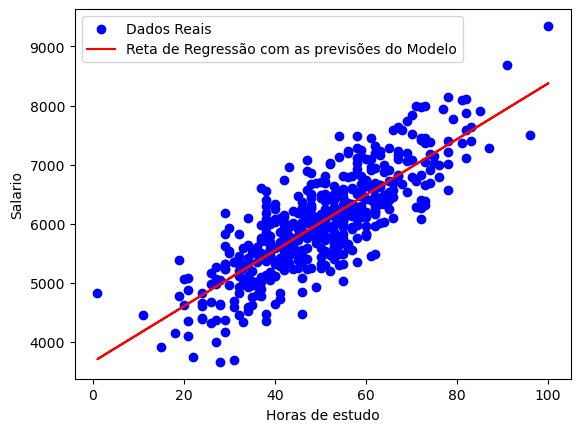

In [90]:
plt.scatter(X, y, color = "blue", label = "Dados Reais")
plt.plot(X, modelo.predict(X), color = "red", label = "Reta de Regressão com as previsões do Modelo")
plt.xlabel("Horas de estudo")
plt.ylabel("Salario")
plt.legend()
plt.show()

In [91]:
score = modelo.score(X_teste, y_teste)
print(f'Coeficiente R^2: {score:.2f}')

Coeficiente R^2: 0.73


Parâmetros do modelo:

In [92]:
modelo.intercept_

3663.0815503788135

In [93]:
modelo.coef_

array([47.13372307])

Fórmula da regressão linear:

$\hat y = 3663 + 47,13x$

### Deploy do Modelo

Uso do modelo para prever o salário com base nas horas de estudo. (engenheiro de machine learning)

In [87]:
horas_de_estudo = np.array([[48]])

previsao_salario = modelo.predict(horas_de_estudo)

previsao_salario

array([5925.50025756])

Para uma pessoa que estuda 48 horas a previsão de salário é de R$ 5925